![](https://i.imgur.com/0AUxkXt.png)

# Lab 2 - Pandas & Seaborn

## Import libraries

In [0]:
# Your code here
# Hint: copy from the lecture notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import data

In this Lab we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [0]:
# Run this code
tips = sns.load_dataset('tips')

### Overview

**Show the first 3 rows of the data**

In [0]:
# Your code here
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Show the last 2 rows of the data

In [0]:
# Your code here
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Show 4 randoms rows

In [0]:
# Your code here
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
115,17.31,3.50,Female,No,Sun,Dinner,2
137,14.15,2.00,Female,No,Thur,Lunch,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
108,18.24,3.76,Male,No,Sat,Dinner,2


### Print a concise summary of the data

Print information about the data including the index dtype and column dtypes, non-null values and memory usage.

In [0]:
# Your code here
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### Generate descriptive statistics

A descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [0]:
# Your code here
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## EDA - Exploratory Data Analysis

**What is the min/max of tip?**

In [0]:
# Your code here
print(tips['tip'].min())
print(tips['tip'].max())

1.0
10.0


**The restaurant is open on which days of the week?**

*Hint: unique values of the column `day`*

In [0]:
# Your code here
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

**List of unique values in column `time`**

In [0]:
# Your code here
tips['time'].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

**What is the range of table size?**

In [0]:
# Your code here
print(tips['size'].unique())
# or
min_size = tips['size'].min()
max_size = tips['size'].max()
print('Table size is from', min_size, 'to', max_size)


[2 3 4 1 6 5]
Table size is from 1 to 6


**How many man/woman paid for the dish?**


In [0]:
# Your code here
tips['sex'].value_counts()
tips[tips['sex'] == 'Female'].shape[0]
tips[tips['sex'] == 'Male'].shape[0]

157

**What is the percentage of smoker table and their revenue?**

In [0]:
# Your code here
smoker = tips[tips['smoker']=='Yes']
smoker.shape[0] / tips.shape[0]
# cool version
tips[tips['smoker']=='Yes'].shape[0] / tips.shape[0]

smoker['total_bill'].sum() / tips['total_bill'].sum()

0.3998409203421041

**List 3 tables that have the most expensive bill**

In [0]:
# Your code here
tips.sort_values(by=['total_bill'], ascending=False)[:3]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


### Group by - Example

**What is the best day to work - maximum tips (sum and percents)?**

In [0]:
tips2 = tips.groupby('day').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,norm_total_bill,norm_tip,std_total_bill,std_tip,percent
day,,,,,,,,
Thur,1096.33,171.83,152,18.977587,12.203333,-14.647541,-10.163986,15.673201
Fri,325.88,51.96,40,5.604315,3.662222,-5.622399,-3.618934,15.944519
Sat,1778.40,260.40,219,31.657101,19.266667,6.405342,-0.325407,14.642375
Sun,1627.16,247.39,216,29.196481,19.043333,13.864598,14.108327,15.203791


**Your turn: Who eats more (and tips more)? smokers or non smokers?**

In [0]:
# Your code here
tips2 = tips.groupby('smoker').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


### Data Visualization using Seaborn

**Visualize # of tables per day**

*Hint: using the seaborn's function **countplot()** with `x=day` and `data=tips`*

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

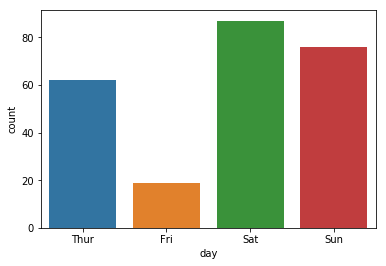

In [0]:
# Your code here
sns.countplot(x='day', data=tips)
tips['day'].value_counts()

**Visualize # of smoker and non-smoker tables**

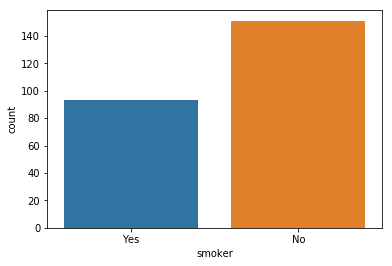

In [0]:
# Your code here
sns.countplot(x='smoker', data=tips)


**Visualize # of male/female customers who pay**

In [0]:
# Your code here


**Analyze the distribution of payments of male and female in different days**

*Hint: countplot with `hue='sex'`*

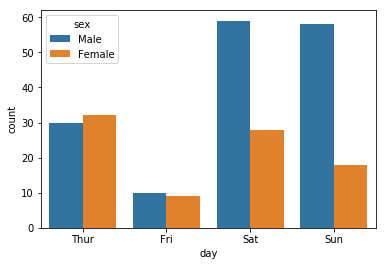

In [0]:
# Your code here
sns.countplot(x='day', hue='sex', data=tips)

**Analyze the # of tables in different time (lunch or dinner) and days**

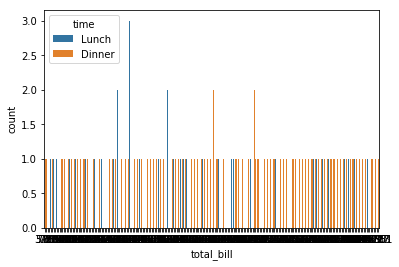

In [0]:
# Your code here
sns.countplot(x='day', hue='time', data=tips)

**Example: Visualize the distribution of the total bill**


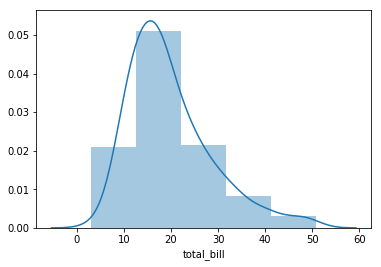

In [0]:
# sns.distplot(tips['total_bill'], bins=5)

**Visualize the distribution of the tip**

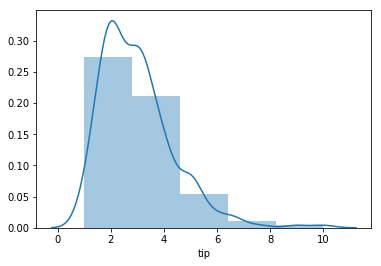

In [0]:
# Your code here
sns.distplot(tips['tip'], bins=5)

**Example: Scatter plot of tip and total bill**

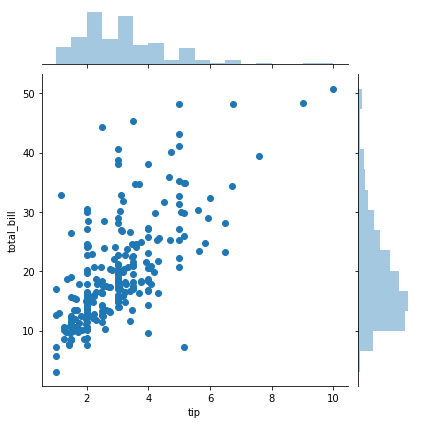

In [0]:
sns.jointplot(x='tip', y='total_bill', data=tips)

**Add one more parameter `kind='hex'` to the previous   `jointplot()` function**

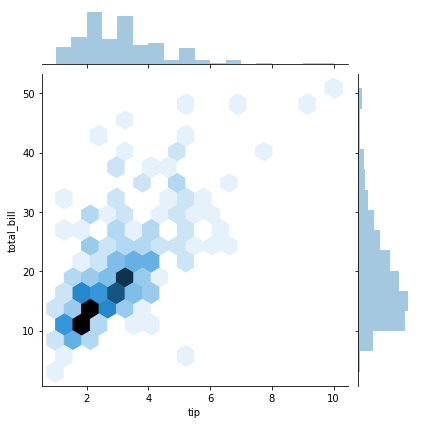

In [0]:
# Your code here
sns.jointplot(x='tip', y='total_bill', data=tips, kind='hex')

**Let's try with `kind='kde'` (KDE - Kernel Density Estimation)**

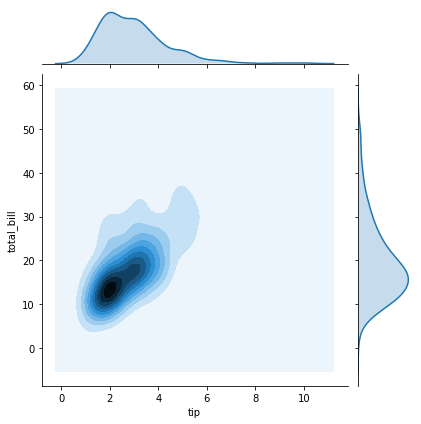

In [0]:
# Your code here
sns.jointplot(x='tip', y='total_bill', data=tips, kind='kde')

**Analyze the relationship between `size` and `tip`**

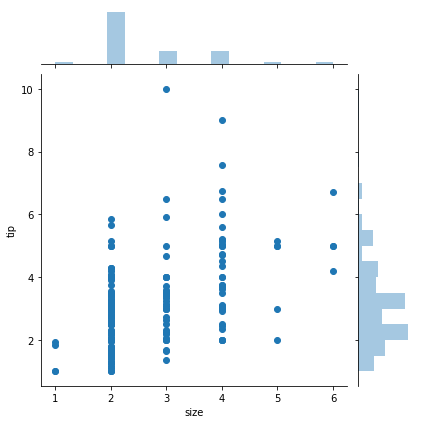

In [0]:
# Your code here
sns.jointplot(x='size', y='tip', data=tips)

**Correlation Matrix**

Show the correlation matrix and comfirm the analytics you have from previous steps.

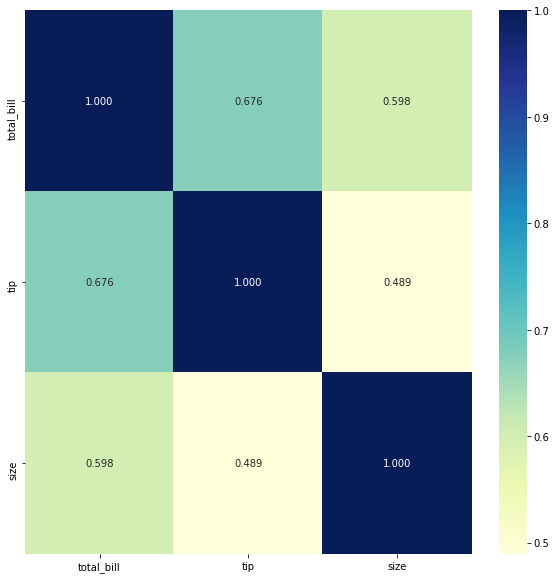

In [0]:
# Your code here
plt.figure(figsize=(10,10))
sns.heatmap(tips.corr(), annot=True, fmt='.3f', cmap='YlGnBu')

**Box plot, Swarm plot and Violin plot**

![](https://i.imgur.com/5Lo17qp.png)

**Implement the seaborn's function `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

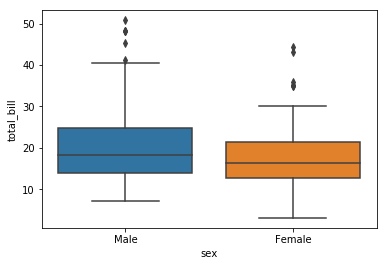

In [0]:
# Your code here
sns.boxplot(x='sex', y='total_bill', data=tips)

**Implement `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

In [0]:
# Your code here
sns.boxplot(x='sex', y='total_bill', data=tips)

**Add `hue='smoker'` to the previous `boxplot()`**

In [0]:
# Your code here

**Implement `swarmplot()` with: `x='day', y='tip', hue='smoker', data=tips`**

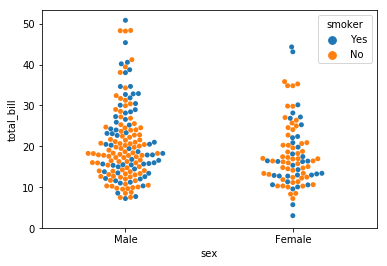

In [0]:
# Your code here
sns.swarmplot(x='sex', y='total_bill',hue='smoker', data=tips)

**Implement previous chart with `violinplot()`**

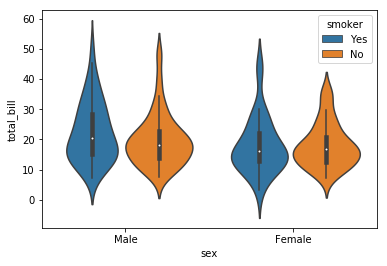

In [0]:
# Your code here
sns.violinplot(x='sex', y='total_bill',hue='smoker', data=tips)

### Bonus

**Total revenue per day**

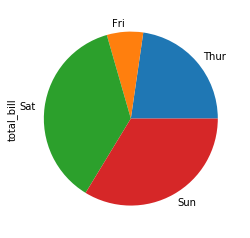

In [0]:
# tips.groupby('day').sum()['total_bill'].plot(kind='bar')

tips.groupby('day').sum()['total_bill'].plot(kind='pie')

**Pie chart of table size in percentage**

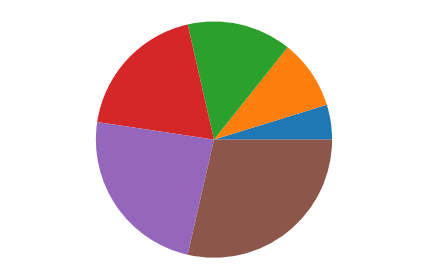

In [0]:
# Pie chart
labels = []
sizes = []
explode = []

labels = tips['size'].value_counts().index.sort_values()
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.5)
    else:
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [0]:
ax1.pie(sizes)
plt.show()

## Great Job!!

In [0]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
tips[(tips['sex'] == 'Male') & (tips['smoker'] == 'Yes')].shape[0]


60

In [29]:
def sum2(a=2, b=3):
  c = a + b
  return c
sum2(3, 4)

7

In [46]:
tips[['tip','sex', 'total_bill']]

tips['tip']

tips[ tips['tip'] < 2 ]

tips[tips['tip'] < 2]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
8,15.04,1.96,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
30,9.55,1.45,Male,No,Sat,Dinner,2
43,9.68,1.32,Male,No,Sun,Dinner,2
53,9.94,1.56,Male,No,Sun,Dinner,2
57,26.41,1.50,Female,No,Sat,Dinner,2


In [0]:
a = [1, 2, 3]
tips.values

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [0]:
tips['smoker'].value_counts().values

array([151,  93])